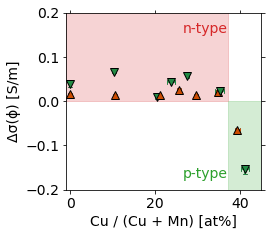

In [1]:
import json
import os
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})
from scipy.optimize import curve_fit
from uncertainties import ufloat
import numpy as np

import matplotlib.patheffects as peff


files = [fn for fn in os.listdir(os.path.join("..", "data", "perovskite")) if fn.endswith("json")]

def fnToColor(fn):
    fn = fn.split("-")[3]
    if fn in ["30649", "30867", "31180", "30635", "30659", "30624", "31285"]:
        return ("#238b45", "v")
    else:
        return ("#cc4c02", "^")

percentages = {
    "30649": {"A": [19.80, 0.78], "Mn": [20.16, 2.18], "Cu": [0.00, 0.00]} ,# , "O": 3.63},
    "30867": {"A": [19.41, 1.68], "Mn": [16.96, 1.22], "Cu": [1.94, 1.86]} ,# , "O": 3.87},
    "31180": {"A": [20.03, 1.13], "Mn": [15.93, 3.40], "Cu": [4.10, 0.09]} ,# , "O": 5.31},
    "30635": {"A": [19.38, 2.36], "Mn": [15.69, 2.42], "Cu": [4.86, 4.79]} ,# , "O": 4.56},
    "30659": {"A": [19.61, 0.49], "Mn": [15.16, 0.67], "Cu": [5.77, 1.71]} ,# , "O": 4.04},
    "30624": {"A": [19.47, 1.63], "Mn": [12.89, 1.95], "Cu": [6.98, 4.10]} ,# , "O": 6.24},
    "31285": {"A": [20.05, 2.89], "Mn": [11.99, 0.03], "Cu": [8.36, 4.16]} ,# , "O": 3.79},
    "30650": {"A": [21.47, 1.23], "Mn": [20.58, 1.98], "Cu": [0.00, 0.00]} ,# , "O": 4.67},
    "31070": {"A": [19.85, 2.94], "Mn": [16.80, 3.35], "Cu": [1.97, 0.14]} ,# , "O": 4.48},
    "31021": {"A": [20.27, 0.50], "Mn": [15.38, 0.87], "Cu": [4.09, 1.05]} ,# , "O": 3.56},
    "30637": {"A": [21.12, 0.77], "Mn": [15.34, 1.13], "Cu": [5.29, 2.15]} ,# , "O": 3.29},
    "30934": {"A": [21.19, 0.76], "Mn": [14.13, 1.17], "Cu": [5.94, 0.67]} ,# , "O": 3.77},
    "31176": {"A": [21.43, 1.05], "Mn": [13.66, 1.23], "Cu": [7.26, 1.70]} ,# , "O": 3.80},
    "31163": {"A": [20.44, 1.22], "Mn": [12.49, 0.98], "Cu": [8.08, 2.18]} ,# , "O": 3.74}
}

atomic = {}
for k, v in percentages.items():
    atomic[k] = {}
    for el, pc in v.items():
        atomic[k][el] = ufloat(pc[0], pc[0] * pc[1]/100)

key = "Δσ(ϕ)"          
fig, ax = plt.subplots(figsize=(4, 3.5))
x = []
y = []
for fn in files:
    with open(os.path.join("..", "data", "perovskite", fn)) as infile:
        d = json.load(infile)
        sn = fn.split("-")[3]
        dl, cl, bl = ax.errorbar((atomic[sn]["Cu"]/(atomic[sn]["Mn"] + atomic[sn]["Cu"])).n * 100, d["results"][key][0], 
                                 yerr=d["results"][key][1], xerr= (atomic[sn]["Cu"]/(atomic[sn]["Mn"] + atomic[sn]["Cu"])).s * 100,
                                 color=fnToColor(fn)[0], capsize=2, 
                                 marker=fnToColor(fn)[1], markeredgecolor="k", markersize=8)
        for c in cl:
            c.set_path_effects([peff.withStroke(linewidth=1, foreground='k')])
ax.set_xlabel(r"Cu / (Cu + Mn) [at%]")
ax.set_ylabel(f"{key} [{d['results'][key][2]}]")
ax.tick_params(axis="x", top=True, labeltop=False, bottom=True, labelbottom=True)
ax.tick_params(axis="y", left=True, labelleft=True, right=True, labelright=False)
ax.fill_between([-1,37],[1,1], color="C3", alpha=0.2)
ax.text(37,0.18,"n-type", color="C3", va="top", ha="right")
ax.fill_between([37,50],[-1,-1], color="C2", alpha=0.2)
ax.text(37,-0.18,"p-type", color="C2", va="bottom", ha="right")
ax.set_xlim(left=-1, right=45)
ax.set_ylim(bottom=-0.2, top=0.2)
plt.tight_layout()
plt.show()
fig.savefig(os.path.join("..", "outputs", "pn_type.pdf"), dpi=300, format="pdf", pad_inches=0.1, bbox_inches="tight")